<a href="https://colab.research.google.com/github/Juanje932/Diplomado_IAJUAN/blob/Modulo-4/Ejemplo_2_MNIST_CNN_diplomado_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:

# Cargar el dataset de MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0


In [4]:
# Convertir las etiquetas a formato one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# Definir la arquitectura del modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512,activation='relu'),  # Capa densa con 512 neuronas
    Dense(512,activation='relu'),  # Segunda capa densa con 512 neuronas
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada clase)
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Entrenar el modelo
history = model.fit(train_images,train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.2158 - accuracy: 0.9358 - val_loss: 0.0973 - val_accuracy: 0.9689
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9759 - val_loss: 0.0737 - val_accuracy: 0.9760
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0672 - val_accuracy: 0.9788
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.0617 - val_accuracy: 0.9800
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.9911 - val_loss: 0.0698 - val_accuracy: 0.9791
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0764 - val_accuracy: 0.9789
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0719 - val_accuracy: 0.9820
Epoch 

In [9]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9823
Test accuracy: 0.9822999835014343


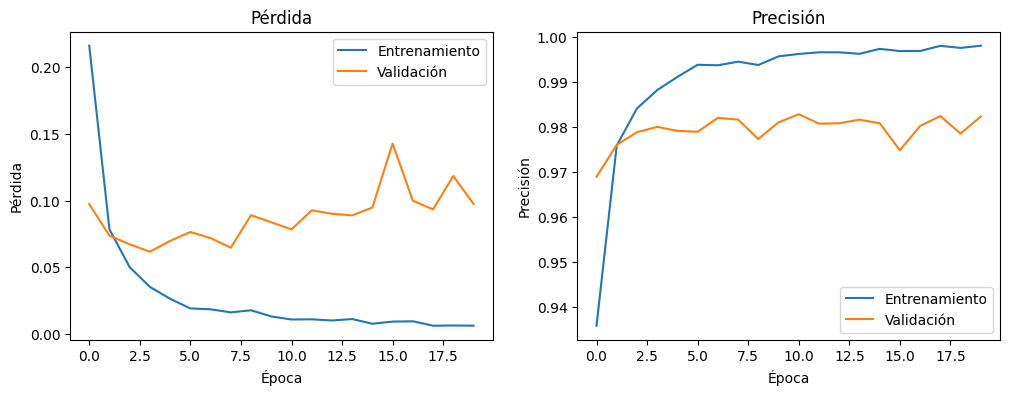

In [10]:
# Graficar la pérdida y la precisión del entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()

# Redimensionar las imágenes para incluir el canal de color

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Cargar el dataset de MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Redimensionar las imágenes para incluir el canal de color
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [5]:
# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0


In [6]:
# Convertir las etiquetas a formato one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
# Definir la arquitectura del modelo CNN
model = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),  # Primera capa convolucional
    MaxPooling2D(pool_size=(2,2)),  # Primera capa de pooling
    Flatten(),  # Aplanar las salidas
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada clase)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [8]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels)
)

Epoch 1/20
469/469 [==============================] - 5s 4ms/step - loss: 0.1934 - accuracy: 0.9433 - val_loss: 0.0778 - val_accuracy: 0.9751
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0617 - accuracy: 0.9822 - val_loss: 0.0549 - val_accuracy: 0.9823
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0515 - val_accuracy: 0.9826
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0396 - val_accuracy: 0.9870
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.0403 - val_accuracy: 0.9866
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0443 - val_accuracy: 0.9862
Epoch 

In [10]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9865
Test accuracy: 0.9865000247955322


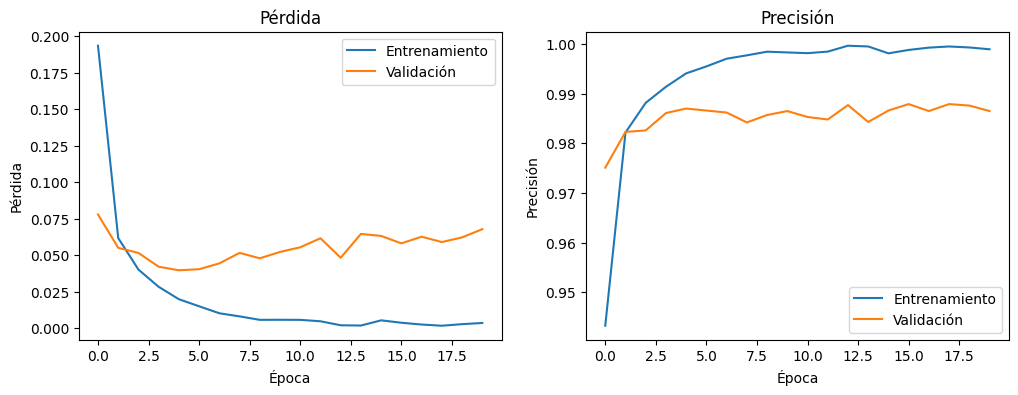

In [11]:
# Graficar la pérdida y la precisión del entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()